In [8]:
import numpy as np

def perceptron(x1, x2, weights, bias):
    x = np.array([x1, x2])  # 입력값 x1, x2를 하나의 벡터로 묶음
    w = np.array(weights)   # 가중치 리스트를 벡터로 변환

    # 퍼셉트론 계산식: (입력 벡터 x 가중치 벡터 내적) + 편향
    return int(np.dot(x, w) + bias > 0)
    # return 1 if (w1*x1 + w2*x2 + b) > 0 else 0

# AND Gate : 두 입력이 모두 1일 때만 1이 되도록 가중치와 편향 설정 
print("AND:", perceptron(1, 1, [0.5, 0.5], -0.7))

# NAND Gate : and 결과를 반대로 만들기 위해 가중치를 음수로 설정
print("NAND:", perceptron(1, 1, [-0.5, -0.5], 0.7))

# OR Gate : 하나라도 1이면 기준값을 넘도록 편향을 작게 설정
print("OR:", perceptron(1, 0, [0.5, 0.5], -0.2))

AND: 1
NAND: 0
OR: 1


퍼셉트론은 가중합 + 편향이 기준(0)을 넘는지로 0/1 을 결정

In [9]:
def weighted_sum(inputs, weights, bias):
    # 입력 벡터와 가중치 벡터의 내적 + 편향
    return np.dot(inputs, weights) + bias

inputs = [1, 0]  # 입력값
weights = [0.8, -0.5]  # 각 입력에 대한 중요도
bias = 0.2  # 판단 기준을 조정하는 편향
output = weighted_sum(inputs, weights, bias)
print("Weighted Sum:", output)

Weighted Sum: 1.0


In [10]:
from sklearn.neural_network import MLPClassifier

# XOR 문제 해결
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

mlp = MLPClassifier(
    hidden_layer_sizes=(2,),  # 은닉층 구조: 은닉층 1개, 뉴런 2개
    activation='relu',        # 은닉층 활성화 함수 (relu : 비선형성 부여)
    max_iter=1000             # 최대 학습 반복 횟수 
)
mlp.fit(X, y)

print("Prediction:", mlp.predict(X))

Prediction: [0 0 0 0]


/Users/jy/dl/dl_venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer_sizes=(2,),  # 은닉층 구조: 은닉층 1개, 뉴런 2개
hidden_layer_sizes=(4,), # 은닉층 구조: 은닉층 1개, 뉴런 4개
hidden_layer_sizes=(3,2), # 은닉층 2개구조: 첫층 3개, 두번째 층 2개

은닉층의  activation ( 활성화 함수 )
주요 사용하는 것 : 'relu' 계열 (
    relu,       - 기장 많이 사용(음수에서 기울기가 죽음)
    Leaky Relu, - relu에서 발생하는 죽은 기울기 문제를 해결(음수 영역에서도 사용가능)
    ELU,GELU    - 딥러닝 Transformer 에서 자주 사용한다
    )
    
tanh : -1 ~ 1 범위, 비선형 문제에 적합

출력 범위가 -1 ~ 1 인것이 의미가 있을 때 사용한다
    - 입력/ 출력이 0을 중심으로 대칭을 이룰 때
    - 내부 표현에서 부호 정보가 중요할 때
    - RNN 계열 (전통적인 RNN,LSTM)

logistic : 시그모이드 함수 ( 초기 신경망에서 사용 )


출력층의 activation (활성화함수)
이진분류 : sigmoid (출력 범위 0~1. 결과를 확률로 해석 가능) 
다중 분류 : softmax (출력 범위 0~1. 각 클래스에 대한 확률 분포. 모든 출력값의 합 = 1)

회귀 : 예측 값 그대로 사용

##시그모이드 함수 구현

In [11]:
def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.linspace(-10, 10, 100)
y = step_function(x)
plt.step(x, y)
plt.title("Step Function")
plt.show()

NameError: name 'plt' is not defined

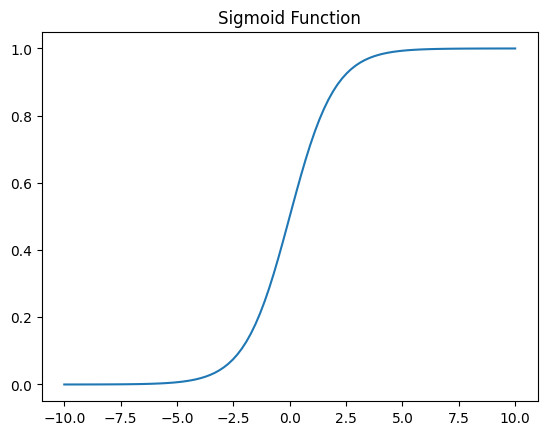

In [ ]:
def sigmoid(x):
    # 입력값을 0 ~ 1 사이로 압축하는 시그모이드 함수 수식 
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100) # -10 ~ 10 까지 균등한 값
y = sigmoid(x)

import matplotlib.pyplot as plt
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.show()

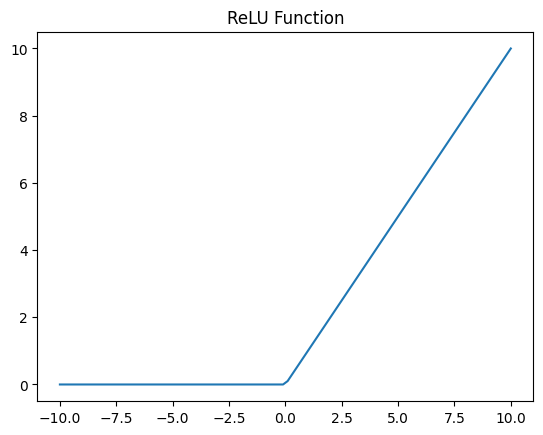

In [ ]:
def relu(x):
    # 0 보다 작으면 0, 0 보다 크면 출력
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)
plt.plot(x, y)
plt.title("ReLU Function")
plt.show()

- Relu 함수가 Sigmoid 보다 좋은점 
1. 기울기 (함수가 얼마나 변하는가, 수학값으로는 미분값) 소실 문제 완화
    - 기울기가 1이다? 입력이 바뀌는 만큼 그대로 출력값도 바뀐다. => Relu 양수 기울기
    - lr 하이퍼 파라미터 사용하면 가중 업데이트시에 (lr * 기울기) 값으로 가중치 값을 업데이트 해준다.
    - 결론적으로 역전파 시 기울기가 줄어들지 않고 전달이 잘 된다. = 깊은 신경망에서도 신호가 잘 전달된다

2. 계산 효율이 매우 높다
    - 지수 계산이 없고 단순하게 비교 연산 => 대규모 모델 학습에 유리

한계점 은 음수 영역에서 기울기가 0 -> Dead Relu 문제 발생
=> Leaky Relu, Parametric Relu, ELU 등 

결론적으로는 은닉층 활성화함수로 표준
하지만 출력층에서는 문제 유형에 따라 매우 제한적으로 사용한다

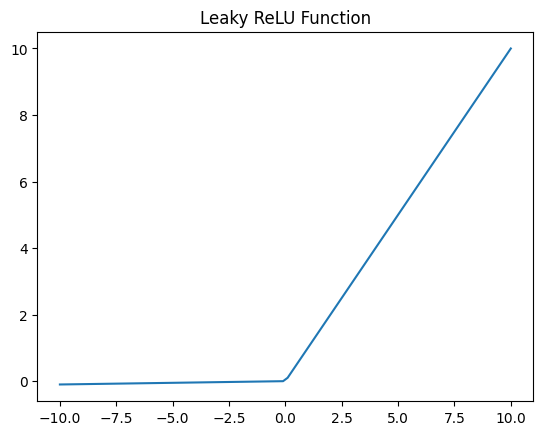

In [ ]:
def leaky_relu(x, alpha=0.01):
    # x 가 0 이상이면 x값 그대로 사용,0미만이면 작은기울기 (alpha)를 곱해 출력
    return np.where(x >= 0, x, alpha * x)

x = np.linspace(-10, 10, 100)
y = leaky_relu(x)
plt.plot(x, y)
plt.title("Leaky ReLU Function")
plt.show()

Relu의 문제
x < 0 구간에서 출력 = 0, 기울기 = 0
한번 음수로 떨어지면 가중치 업데이트가 멈춰버리는 Dead ReLU

Leaky ReLU
x < 0 에서도 기울기 a 곱해 유지 = 학습신호가 0으로 완전히 끊기지 않는다

결론적으로 Leaky Relu가 ReLU의 단순함을 유지하면서, 음수영역에서도 학습이 멈추지 않도록 만든 활성화 함수

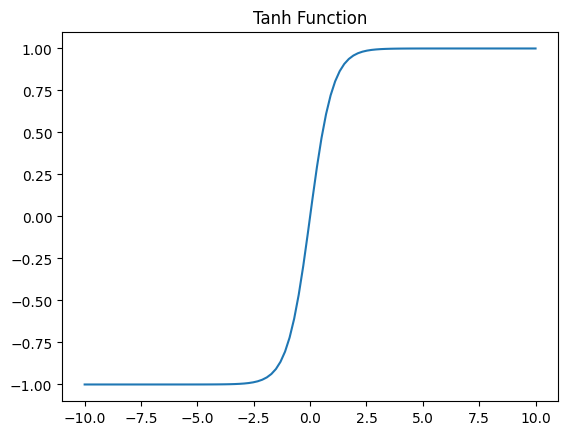

In [ ]:
def tanh(x):
    return np.tanh(x)

x = np.linspace(-10, 10, 100)
y = tanh(x)
plt.plot(x, y)
plt.title("Tanh Function")
plt.show()

## (100 (배치크기), 256(너비), 256(높이), 3가지 채널) png rgba 4 

In [ ]:
# 행렬의 내적
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 행렬의 내적 계산
C = np.dot(A, B)
print(C)

# 또는
C = A @ B
print(C)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [ ]:
print(A.shape,B.shape)

(2, 2) (2, 2)


In [ ]:
X = np.array([1.0, 2.0, 3.0])
W = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])

# 신경망의 내적 계산
Y = np.dot(W, X)
print(Y)

[1.4 3.2]


In [ ]:
print(X.shape,W.shape)

(3,) (2, 3)


In [ ]:
def identity_function(x):
    return x

x = np.array([1.0, 2.0, 3.0])
print(identity_function(x))

[1. 2. 3.]


이진 분류 (입계값 기준)  
출력값 >= 0.5 : 클래스 1  
출력값 < 0.5 : 클래스 0  

다중분류 (서로 독립된 확률) -> 하나의 데이터가 여러 클래스에 동시에 속할 수 있는 문제를 해결할 수 있다  

입력값이 한없이 0 이나 1에 가까워지면 기울기가 0에 수렴되는 기울기 소실 문제가 발생할 수도 있습니다.  
=> 주로 은닉층에서는 사용되지 않는다. 출력층에서만 주로 사용하는 이유   

손실함수로는 BCE 사용


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([0.0, 2.0, -1.0])
print(sigmoid(x))

[0.5        0.88079708 0.26894142]


In [ ]:
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

x = np.array([2000.0, 1000.0, 0.0001]) # apple,orange,pear


e^0 = 1
e^1 = 2.71828 => 대략 2.7
e^2 = 7.38.   => 대략 7.4
e^3 = 20.085  => 대략 20.1

총합 (30.2) = 분모 
사과 : 7.4 / 30.2 = 0.245
오렌지 : 2.7 / 30.2 = 0.0894
베 : 20.1 / 30.2 = 0.6656

확률 합 : 1
가장 큰 확률을 가진 클래스 : 배


In [ ]:
print(softmax(x))

[nan nan  0.]


/var/folders/g7/6_f4vlmd2tnf4ghbk1n9tv_40000gn/T/ipykernel_27041/2677340213.py:2: RuntimeWarning: overflow encountered in exp
  exp_x = np.exp(x)
/var/folders/g7/6_f4vlmd2tnf4ghbk1n9tv_40000gn/T/ipykernel_27041/2677340213.py:3: RuntimeWarning: invalid value encountered in divide
  return exp_x / np.sum(exp_x)


In [ ]:
def stable_softmax(x):
    x_max = np.max(x)
    exp_x = np.exp(x - x_max)  # 최대값을 빼서 안정적으로 변환
    return exp_x / np.sum(exp_x)

x = np.array([1000, 1001, 1002])  # 큰 값에서도 안정적으로 동작
print(stable_softmax(x))

[0.09003057 0.24472847 0.66524096]


오버플로우 발생 이유 : 입력값에서 지수 함수를 적용하기 때문에 입력값이 크면 e^x값이 매우 커진다. 수치적으로 계산이 불가능해지는 문제가 발생한다.  
입력값에서 최대값을 빼는 이유는 소프트맥스의 출력결과 (확률비율) 에는 영향을 주지 않기 때문이다.

$$
\frac{e^{x_i}}{\sum_j e^{x_j}}
=
\frac{e^{x_i - c}}{\sum_j e^{x_j - c}}
$$
모든 입력에서 동일한 상수 c(최대값)을 빼준다.
=> 가장 큰값이 0이 되고, 나머지는 음수가 되어 지수 계산에서 안정적이다.

In [ ]:
def stable_softmax(x):
    x_max = np.max(x)
    exp_x = np.exp(x - x_max)  # 최대값을 빼서 안정적으로 변환
    return exp_x / np.sum(exp_x)

x = np.array([5, 3, 1]) 


- 최대값 빼준다.
    - [0, -2, -4]

e^0 = 1.    
e^(-2) = 0.135.    
e^(-4) = 0.018.   

[1, 0.135, 0.018] => 1.153

- 각 클래스별 확률
    - 사과 : 0.8673
    - 오렌지 : 0.1171
    - 배 : 0.0156

- 총 합 : 1
가장 큰 확률을 가진 클래스 : 사과

In [ ]:
print(stable_softmax(x))

[0.86681333 0.11731043 0.01587624]


In [ ]:
import numpy as np

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 예제 데이터
y_true = np.array([3.0, -0.5, 2.0, 7.0])
y_pred = np.array([2.5, 0.0, 2.0, 8.0])

mse = mean_squared_error(y_true, y_pred)
print(f"MSE: {mse}")

MSE: 0.375


In [ ]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mae = mean_absolute_error(y_true, y_pred)
print(f"MAE: {mae}")

MAE: 0.5


In [ ]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error**2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

huber = huber_loss(y_true, y_pred)
print(f"Huber Loss: {huber}")

Huber Loss: 0.1875


In [ ]:
def cross_entropy_error(y_true, y_pred):
    delta = 1e-7  # log(0) 방지를 위한 작은 값
    return -np.sum(y_true * np.log(y_pred + delta))

# 예제 데이터 (One-hot encoding)
y_true = np.array([0, 0, 1])  # 실제 정답 (세 번째 클래스)
y_pred = np.array([0.2, 0.3, 0.5])  # 예측 확률

cee = cross_entropy_error(y_true, y_pred)
print(f"CEE: {cee}")

CEE: 0.6931469805599654


In [ ]:
# 수치 미분 함수 : 함수 f의 x 지점에서의 미분값을 근사치로 계산하는 함수
def numerical_diff(f, x, h=1e-4):               # h는 아주 작은 값
    return (f(x + h) - f(x - h)) / (2 * h)      # 중앙 차분 공식

def function(x):    
    return x**2

print(numerical_diff(function, 3.0))

6.000000000012662


f(3.0001) = 9.0006
f(2.9999) = 8.9994
0.0012 / 0.0002 = 6 (근사치)

근사 오차 (h 값이 커질 때).      
함수의 곡선을 직선으로 가정해서 생기는 오차 (거리 계산으로 인한 오차).      
.      
부동 소수점(h 값이 적을 때).      
컴퓨터가 실수를 유현한 자릿수로 표현하면서 발생한다.      

h값을 적당한 수로 ? 0.0001(1e-4) -> 오차 발생 .      
.      
파라미터 수천 ~ 수백만개 * 2.      
중앙차분의 문제점 .      
f(x * h) , f(x - h) 계산을 2번 해야된다.      

기울기의 개념 이해 .      
-----------------------------------------
실제 신경망(딥러닝 프레임워크에서 자동 계산).      

그래서 우리는 자동미분.      
연산을 계산그래프로 구성.      
연쇄법칙으로 정확한 미분값을 효율적으로 계산.      
=> 오차 없음.      
=> 매우 빠르다 .      
그래서 대규모 신경망에서 사용.      

손실함수
L(w_1, w_2, ..., wn) : 가중치(파라미터)
손실함수는 수많은 가중치에 동시에 의존한다
각 가중치가 손실에 얼마나 영향을 주는지를 확인 => 편미분

딥러닝에서의 학습은 손실 함수에 대한 모든 가중치의 편미분을 계산하고 그 기울기의 반대 방향으로 가중치를 조금씩 이동시키는 과정이다

In [ ]:
# 다변수 함수에서 특정 변수에 대한 펴님분 값을 계산하는 함수
def partial_diff(f, x, y, var='x', h=1e-4):
    if var == 'x':
        return (f(x + h, y) - f(x - h, y)) / (2 * h) # x 만 변화. y 는 고정 (x만 편미분에 사용. 나머지 변수 x는 상수)
    else:
        return (f(x, y + h) - f(x, y - h)) / (2 * h) # y 만 변화. x 는 고정 (y만 편미분에 사용. 나머지 변수 x는 상수)

# 2가지의 입력 변수를 가지는 함수 
def function(x, y):
    return x**2 + y**2

print(partial_diff(function, 3.0, 2.0, 'x')) # x 는3, y = 2  지점에서 x에 대한 편미분
print(partial_diff(function, 3.0, 2.0, 'y')) # x 는3, y = 2  지점에서 y에 대한 편미분

6.000000000012662
3.9999999999995595


편미분 = 무엇을 구하는지 (다변수 함수에서 특정 변수 하나가 결과에 미치는 영향을 수식으로 표현)

자동미분
1. 모든 연산을 계산그래프로 표현
2. 각 연산 노드에서의 국소 미분 계산 
3. 연쇄법칙을 사용해서 최종적으로 각 가중치에 대한 편미분 값을 계산
=> 편미분을 연쇄적으로 계산하는 시스템

손실 L 계산(순전파 시 나온 예측과 실제값을 비교)    
-> L 을 구성하는데 필요한 모든 연산 추적    
각 가중치 w_i에 대해  ∂L / ∂w_i 계산    
-> 다 엮으면 기울기에 대한 벡터(Gradient 벡터) 생성    
-> 경사하강법을 사용해서 가중치 업데이트    

    
==> 자동미분으로 나오는것:    
편미분 값들의 집합 (Grradient 벡터)    
    
편미분 : 각 가중치가 손실에 미치는 영향    
자동미분 : 이 편미분 값을 가지고 계산 그래프와 연쇄법칙을 이용해서 컴퓨터 자동으로 계산해주는 구현 기법    

함수가 가장 빠르게 증가하는 방향과 크기   
방향 : 어디로 움직이면 값이 가장 빨리 변하는가?   
(편미분 값이 큰 변수가 가장 빨리 변하는 변수)   
크기 : 얼마나 민감하게 변하는가   

기울기 벡터는 최종적으로 다변수 함수에서 각 변수에 대한 편미분을 모은 벡터   
=> 의미 : 함수값이 가장 빠르게 증가하는 방향   
경사하강법에서는 이 기울기벡터의 반대방향으로 이동시켜 손실을 최소화하여 학습   

딥러닝 학습    
순전판(Forward) -> 손실 계산 (Loss) -> 기울기 계산 (Backprogation): 자동미분(autograd)      
-> 가중치 업데이트 (Gradient Descent)  

이 과정이 1epoch    
반복적으로 진행한다.   
경사하강법은 손실함수의 기울기를 이용해서, 손실이 가장 빠르게 감소하는 방향으로 가중치를 반복적으로 갱신하는 방법    
이때 학습률 lr 는 모델의 수렴속도와 언정성에 영향을 미치게 된다    

In [ ]:
# 경사하강법 : 함수 f의 최소값에 해당하는 x를 찾는 함수
def gradient_descent(f, init_x, lr=0.1, step_num=100):
    x = init_x                              # 초기값 설정
    for _ in range(step_num):
        grad = numerical_diff(f, x)         # 햔제 x에서의 기울기(미분값) 계산
        x -= lr * grad                      # 기울기의 반대 방향으로 x 업데이트
    return x                                # 최종 x 값 반환

def function(x):
    return x**2

print(gradient_descent(function, 10.0))     # 초기값 10.0에서 시작해 최소값으로 수렴

2.0370359763365053e-09


경사하강법은 현재 위치의 기울기를 이용해서 함수 값이 작아지는 방향으로 반복 이동하는 최적화 방법

tqdm : 반복문을 감싸주면 해당 반복문이 완료될 때 까지 진행 상황과 예상 남은 시간을 자동으로 시각화해주는 라이브러리

In [ ]:
from tqdm import tqdm
import time 

for i in tqdm(range(100)):
    time.sleep(0.5)

100%|██████████| 100/100 [00:50<00:00,  1.98it/s]


tqdm을 사용하면 진행률(%) 진행바, 남은 시간을 자동으로 표시해준다.

In [ ]:
# 딥러닝에서 쓰는 형태
from tqdm import tqdm

n_epochs = 100

for epoch in range(n_epochs):
    for batch in tqdm(train_loader, desc =f"Epoch {epoch + 1}"):
        # forward
        # loss 계산
        # backward
        # optimizer.step()
        pass

Faker : 테스트 데이터 또는 샘플 데이터를 무작위로 생성하는 라이브러리.   
다양한 데이터 유형(이름, 주소, 이메일, 신용카드 정보, 날짜 등)을 생성할 수 있다.

In [ ]:
from faker import Faker 

faker = Faker()
print(faker.name())     # 이름
print(faker.address())  # 주소 
print(faker.email())    # 이메일
print(faker.date_of_birth(minimum_age=18, maximum_age=90)) # 생년월일


Kelly Ferguson
87353 Ortiz Path Apt. 453
Lake Sarabury, KY 15834
hooperwendy@example.net
1980-07-29


In [ ]:
print(faker.first_name())                           # 이름
print(faker.last_name())                            # 성
print(faker.phone_number())                         # 전화번호
print(faker.company())                              # 회사
print(faker.job())                                  # 직업
print(faker.credit_card_number())                   # 신용카드 번호
print(faker.random_int())                           # 무작위 정수
print(faker.boolean(chance_of_getting_true=50))     # 50% 확률로 True/False
print(faker.random_element(elements=('A','B','C'))) # 해당 튜플안에서 무작위 

Keith
Mcconnell
2486606280
Bradley Ltd
Manufacturing engineer
4532687188746
7152
True
C


---------------------------------------------------------------------------------------------------------------------------------------------------------------------

기울기 폭발 - 어떤 층에서 기울기 평균 크기가 1보다 커지면 -> 계속해서 역전파 해나갈때 기울기가 기하급수적으로 커지게 된다

은닉층 중 N개 총 평균 기울기 크기가 1보다 커지면 여러 층을 거치면서 기울기가 기하급수적으로 커진.  
Loss 값이 nan 또는 inf값이 나오게 된다.   
학습이 발산해서 수렴하지 않는다.   

가중치 초기화 기법 활용 -  순전파 역전 시 기울기 분산이 적정수준에서 유지되도록 설계 (Sigmoid, Tanh를 활성화 함수로 사용).   
he 초기화 - 음수 영역이 잘리는 특성을 고려해 기울기 소실 방지하도록 분산을 더 크게 설정 (ReLU 계열).   

그래디언트 클리핑 - 갑 직접 제한.   
가중치 초기화 기법 - 분산 설계.    

수치적 불안정성    
  → 기울기 소실   
    → 기울기가 0에 가까워진다 (학습 정체)   
    → 기울기가 비정상적으로 커진다 (발산)   
각 층의 입력을 미니배치 기준으로 정규화. 평균 0, 표준편차 1 조정   
  → 기울기 분포 안정화   
  → 학습속도 향상   
  → 초기값, 학습률에 덜 민감   
L2 정규화    
  → 손실함수에 규제항을 넣는다    

기울기 계산의 수치적 안정성   
    가중치가 과도하게 커지는 것을 억제   
      → 기울기 폭주 방지.  
      → 모델의 복잡도 감소   

배치 정규화    
 → 대상 : 활성화(입력 분포)    
 → 방식 : 기울기 분포 안정.     

L2 정규화    
 → 대상 : 가중치 크기.     
 → 방식 : 기울기 크기 제한.     